In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]
print(len(X))

100


In [25]:
vMass_OS_all_cut = [57896.0, 56599.0, 53995.0, 52793.0, 51047.0, 48582.0, 47270.0, 45285.0, 43507.0, 41936.0, 40474.0, 38644.0, 
                    36985.0, 35506.0, 33903.0, 32203.0, 30526.0, 29337.0, 28391.0, 27104.0, 25745.0, 24765.0, 23450.0, 22278.0, 
                    21580.0, 20615.0, 19777.0, 18892.0, 18192.0, 17468.0, 16507.0, 16004.0, 15516.0, 14849.0, 14401.0, 14229.0, 
                    13849.0, 13946.0, 14304.0, 14977.0, 17259.0, 20012.0, 25442.0, 33907.0, 43314.0, 48903.0, 45509.0, 34395.0, 
                    21777.0, 13409.0, 9238.0, 7356.0, 6559.0, 5897.0, 5510.0, 5173.0, 5087.0, 4850.0, 4766.0, 4727.0, 4662.0, 
                    4768.0, 4585.0, 4391.0, 4171.0, 3659.0, 3360.0, 3113.0, 3081.0, 2957.0, 2778.0, 2691.0, 2606.0, 2591.0, 
                    2495.0, 2383.0, 2380.0, 2199.0, 2155.0, 2089.0, 2020.0, 1974.0, 1905.0, 1796.0, 1798.0, 1716.0, 1631.0, 
                    1608.0, 1504.0, 1511.0, 1452.0, 1461.0, 1387.0, 1365.0, 1312.0, 1284.0, 1275.0, 1194.0, 1214.0, 1117.0]

vMass_LS_all_cut = [10882.0, 10593.0, 10242.0, 10003.0, 9724.0, 9266.0, 9108.0, 8676.0, 8195.0, 7896.0, 7765.0, 7387.0, 7070.0, 6773.0, 
                    6505.0, 6310.0, 6054.0, 5900.0, 5612.0, 5419.0, 5234.0, 5115.0, 4867.0, 4698.0, 4464.0, 4368.0, 4141.0, 4053.0, 
                    4085.0, 3786.0, 3690.0, 3534.0, 3390.0, 3432.0, 3316.0, 3226.0, 3012.0, 2897.0, 2859.0, 2737.0, 2681.0, 2585.0, 
                    2534.0, 2368.0, 2442.0, 2278.0, 2170.0, 2177.0, 2039.0, 2027.0, 1891.0, 1968.0, 1869.0, 1799.0, 1758.0, 1711.0, 
                    1624.0, 1559.0, 1539.0, 1444.0, 1494.0, 1373.0, 1340.0, 1385.0, 1305.0, 1119.0, 1252.0, 1206.0, 1208.0, 1107.0, 
                    1119.0, 1010.0, 1069.0, 1000.0, 980.0, 984.0, 894.0, 863.0, 846.0, 852.0, 818.0, 753.0, 824.0, 747.0, 765.0, 
                    722.0, 677.0, 750.0, 711.0, 683.0, 646.0, 661.0, 589.0, 621.0, 582.0, 582.0, 559.0, 552.0, 555.0, 500.0]

In [4]:
vMass_OS_CMUL = [93470.0, 89154.0, 83733.0, 80295.0, 76234.0, 71664.0, 68589.0, 65228.0, 61727.0, 58942.0, 
                 56171.0, 53304.0, 50137.0, 48177.0, 45405.0, 43092.0, 40689.0, 38742.0, 37198.0, 35434.0, 
                 33522.0, 32075.0, 30305.0, 28693.0, 27618.0, 26370.0, 25262.0, 23987.0, 23203.0, 22220.0, 
                 21071.0, 20411.0, 19732.0, 18966.0, 18296.0, 18066.0, 17785.0, 17759.0, 18112.0, 18770.0, 
                 21067.0, 23969.0, 29539.0, 38275.0, 47773.0, 53561.0, 49775.0, 37949.0, 24622.0, 15769.0, 
                 11335.0, 9280.0, 8281.0, 7547.0, 7049.0, 6682.0, 6503.0, 6294.0, 6136.0, 6066.0, 5940.0, 
                 5994.0, 5759.0, 5613.0, 5292.0, 4762.0, 4448.0, 4106.0, 3999.0, 3947.0, 3744.0, 3624.0, 
                 3469.0, 3461.0, 3262.0, 3175.0, 3200.0, 2922.0, 2959.0, 2832.0, 2714.0, 2696.0, 2637.0, 
                 2472.0, 2490.0, 2369.0, 2264.0, 2254.0, 2096.0, 2080.0, 1995.0, 2086.0, 1921.0, 1930.0, 
                 1859.0, 1800.0, 1798.0, 1684.0, 1738.0, 1598.0]

vMass_LS_CMUL = [23279.0, 22205.0, 21061.0, 20075.0, 19196.0, 18035.0, 17434.0, 16523.0, 15506.0, 14831.0, 
                 14398.0, 13281.0, 12849.0, 12153.0, 11671.0, 11325.0, 10579.0, 10303.0, 9787.0, 9396.0, 
                 8978.0, 8667.0, 8333.0, 7927.0, 7487.0, 7266.0, 6830.0, 6702.0, 6588.0, 6180.0, 6001.0, 
                 5779.0, 5610.0, 5470.0, 5242.0, 5078.0, 4887.0, 4606.0, 4536.0, 4306.0, 4238.0, 4102.0, 
                 3996.0, 3776.0, 3761.0, 3639.0, 3461.0, 3402.0, 3224.0, 3179.0, 3057.0, 3031.0, 2936.0, 
                 2783.0, 2730.0, 2651.0, 2620.0, 2462.0, 2488.0, 2363.0, 2339.0, 2207.0, 2142.0, 2222.0, 
                 2061.0, 1871.0, 1992.0, 1989.0, 1928.0, 1851.0, 1822.0, 1725.0, 1730.0, 1692.0, 1614.0, 
                 1604.0, 1562.0, 1453.0, 1395.0, 1428.0, 1339.0, 1302.0, 1410.0, 1296.0, 1329.0, 1252.0, 
                 1151.0, 1288.0, 1220.0, 1199.0, 1114.0, 1145.0, 1068.0, 1116.0, 1074.0, 1054.0, 1012.0, 
                 987.0, 999.0, 906.0]

In [5]:
vMass_OS_nothing = [121901.0, 116094.0, 108979.0, 103922.0, 98793.0, 92978.0, 88413.0, 84144.0, 79554.0, 
                    75928.0, 72198.0, 68404.0, 64648.0, 61973.0, 58571.0, 55637.0, 52708.0, 50121.0, 
                    47898.0, 45844.0, 43426.0, 41511.0, 39381.0, 37267.0, 36060.0, 34570.0, 32911.0, 
                    31332.0, 30433.0, 29180.0, 27788.0, 26828.0, 26036.0, 24897.0, 24165.0, 23688.0, 
                    23263.0, 23079.0, 23497.0, 24015.0, 26326.0, 29328.0, 35040.0, 43877.0, 53671.0, 
                    59383.0, 55279.0, 43117.0, 29126.0, 19892.0, 15209.0, 12847.0, 11646.0, 10802.0, 
                    10213.0, 9728.0, 9526.0, 9259.0, 9140.0, 8852.0, 8677.0, 8654.0, 8322.0, 8256.0, 
                    7866.0, 7144.0, 6726.0, 6358.0, 6234.0, 6070.0, 5924.0, 5713.0, 5478.0, 5385.0, 
                    5212.0, 5012.0, 5002.0, 4765.0, 4662.0, 4542.0, 4428.0, 4279.0, 4246.0, 4100.0, 
                    4078.0, 3901.0, 3728.0, 3736.0, 3557.0, 3518.0, 3351.0, 3452.0, 3239.0, 3271.0, 
                    3171.0, 3011.0, 2997.0, 2933.0, 2974.0, 2727.0]

vMass_LS_nothing = [58564.0, 55328.0, 52212.0, 49312.0, 46491.0, 44467.0, 42220.0, 39821.0, 37376.0, 
                    36045.0, 34090.0, 31866.0, 30424.0, 28973.0, 27908.0, 26565.0, 25038.0, 24253.0, 
                    22950.0, 21922.0, 21116.0, 19875.0, 19345.0, 18343.0, 17618.0, 16980.0, 16025.0, 
                    15326.0, 14943.0, 14250.0, 13710.0, 13194.0, 12817.0, 12382.0, 11936.0, 11506.0, 
                    11110.0, 10555.0, 10270.0, 9744.0, 9560.0, 9061.0, 8955.0, 8460.0, 8255.0, 
                    8143.0, 7809.0, 7591.0, 7225.0, 7077.0, 6921.0, 6708.0, 6482.0, 6297.0, 
                    6147.0, 5920.0, 5797.0, 5535.0, 5632.0, 5348.0, 5216.0, 5002.0, 4887.0, 
                    4854.0, 4677.0, 4398.0, 4301.0, 4425.0, 4269.0, 4140.0, 4035.0, 3944.0, 
                    3855.0, 3817.0, 3657.0, 3586.0, 3567.0, 3392.0, 3258.0, 3221.0, 3104.0, 
                    2976.0, 3098.0, 3029.0, 2965.0, 2889.0, 2694.0, 2751.0, 2659.0, 2620.0, 
                    2519.0, 2519.0, 2474.0, 2417.0, 2403.0, 2365.0, 2232.0, 2241.0, 2157.0, 2067.0]

In [6]:
vMass_OS_y = [81898.0, 78086.0, 73190.0, 70127.0, 66668.0, 62628.0, 59919.0, 56875.0, 53821.0, 51342.0, 48977.0, 46421.0, 43783.0, 
                 41750.0, 39567.0, 37315.0, 35263.0, 33556.0, 32343.0, 30667.0, 29008.0, 27763.0, 26214.0, 24657.0, 23848.0, 22705.0, 
                 21726.0, 20570.0, 19859.0, 18978.0, 17906.0, 17301.0, 16759.0, 16000.0, 15369.0, 15237.0, 14775.0, 14780.0, 15125.0, 
                 15780.0, 18037.0, 20735.0, 26103.0, 34578.0, 43970.0, 49509.0, 46105.0, 34913.0, 22227.0, 13815.0, 9590.0, 7697.0, 
                 6833.0, 6167.0, 5765.0, 5413.0, 5320.0, 5043.0, 4961.0, 4927.0, 4848.0, 4926.0, 4746.0, 4565.0, 4325.0, 3805.0, 3501.0, 
                 3235.0, 3185.0, 3072.0, 2864.0, 2776.0, 2688.0, 2693.0, 2581.0, 2480.0, 2470.0, 2277.0, 2235.0, 2161.0, 2089.0, 2031.0, 
                 1985.0, 1858.0, 1863.0, 1781.0, 1687.0, 1665.0, 1553.0, 1551.0, 1499.0, 1517.0, 1426.0, 1404.0, 1351.0, 1324.0, 1322.0, 
                 1239.0, 1251.0, 1149.0]

vMass_LS_y = [18854.0, 18087.0, 17170.0, 16404.0, 15584.0, 14634.0, 14045.0, 13306.0, 12380.0, 11855.0, 11498.0, 10602.0, 10295.0, 9711.0, 
              9216.0, 9025.0, 8354.0, 8122.0, 7715.0, 7394.0, 7039.0, 6808.0, 6481.0, 6170.0, 5822.0, 5639.0, 5336.0, 5188.0, 5102.0, 4782.0, 
              4589.0, 4411.0, 4234.0, 4203.0, 4018.0, 3925.0, 3651.0, 3445.0, 3435.0, 3242.0, 3164.0, 3053.0, 2947.0, 2795.0, 2807.0, 2634.0, 
              2509.0, 2480.0, 2364.0, 2279.0, 2171.0, 2217.0, 2113.0, 1998.0, 1964.0, 1882.0, 1827.0, 1745.0, 1728.0, 1612.0, 1640.0, 1515.0, 
              1449.0, 1530.0, 1442.0, 1227.0, 1375.0, 1330.0, 1313.0, 1225.0, 1228.0, 1122.0, 1166.0, 1090.0, 1066.0, 1062.0, 981.0, 942.0, 
              916.0, 921.0, 881.0, 823.0, 899.0, 806.0, 836.0, 779.0, 732.0, 810.0, 768.0, 734.0, 689.0, 708.0, 635.0, 669.0, 646.0, 620.0, 
              588.0, 590.0, 608.0, 542.0]

In [7]:
vMass_OS_pT = [65395.0, 64049.0, 61278.0, 59957.0, 57952.0, 55134.0, 53694.0, 51514.0, 49552.0, 47938.0, 46195.0, 44215.0, 42135.0, 40748.0, 
               38787.0, 37016.0, 35089.0, 33769.0, 32589.0, 31205.0, 29683.0, 28538.0, 27035.0, 25838.0, 24917.0, 23880.0, 22941.0, 21940.0, 
               21160.0, 20369.0, 19407.0, 18797.0, 18185.0, 17563.0, 17024.0, 16816.0, 16630.0, 16663.0, 17058.0, 17736.0, 20045.0, 23039.0, 
               28648.0, 37345.0, 46901.0, 52737.0, 48976.0, 37220.0, 23990.0, 15203.0, 10782.0, 8746.0, 7829.0, 7117.0, 6605.0, 6279.0, 6109.0,
               5939.0, 5757.0, 5705.0, 5597.0, 5683.0, 5411.0, 5254.0, 4994.0, 4462.0, 4154.0, 3849.0, 3749.0, 3682.0, 3496.0, 3390.0, 3244.0, 
               3219.0, 3038.0, 2948.0, 2991.0, 2701.0, 2738.0, 2603.0, 2530.0, 2520.0, 2435.0, 2299.0, 2301.0, 2187.0, 2106.0, 2093.0, 1929.0, 
               1938.0, 1861.0, 1918.0, 1765.0, 1803.0, 1718.0, 1664.0, 1687.0, 1562.0, 1614.0, 1486.0]

vMass_LS_pT = [14092.0, 13679.0, 13148.0, 12827.0, 12526.0, 11974.0, 11803.0, 11303.0, 10689.0, 10346.0, 10139.0, 9678.0, 9267.0, 8890.0, 8619.0, 
               8266.0, 7994.0, 7795.0, 7406.0, 7156.0, 6906.0, 6751.0, 6474.0, 6216.0, 5892.0, 5743.0, 5409.0, 5332.0, 5343.0, 4992.0, 4867.0, 4727.0, 
               4557.0, 4493.0, 4364.0, 4196.0, 4033.0, 3829.0, 3770.0, 3601.0, 3566.0, 3446.0, 3384.0, 3152.0, 3208.0, 3062.0, 2935.0, 2905.0, 2716.0, 
               2707.0, 2589.0, 2614.0, 2502.0, 2420.0, 2331.0, 2317.0, 2240.0, 2119.0, 2145.0, 2019.0, 2012.0, 1918.0, 1868.0, 1912.0, 1782.0, 1594.0, 
               1702.0, 1723.0, 1675.0, 1595.0, 1561.0, 1488.0, 1478.0, 1454.0, 1409.0, 1390.0, 1339.0, 1246.0, 1206.0, 1232.0, 1166.0, 1134.0, 1213.0, 
               1110.0, 1137.0, 1091.0, 1011.0, 1127.0, 1054.0, 1029.0, 979.0, 1001.0, 936.0, 979.0, 925.0, 921.0, 896.0, 869.0, 871.0, 772.0]

In [28]:
vMass_OS_theta = [88795.0, 84721.0, 79486.0, 76289.0, 72422.0, 68157.0, 65304.0, 62099.0, 58727.0, 56057.0, 53542.0, 50775.0, 47869.0, 45857.0, 43344.0, 
                  41062.0, 38913.0, 36983.0, 35582.0, 33862.0, 31951.0, 30598.0, 28916.0, 27368.0, 26420.0, 25216.0, 24113.0, 22918.0, 22222.0, 21192.0, 
                  20080.0, 19423.0, 18757.0, 18038.0, 17420.0, 17131.0, 16867.0, 16835.0, 17203.0, 17826.0, 20154.0, 23053.0, 28633.0, 37356.0, 46940.0, 
                  52738.0, 48964.0, 37203.0, 23939.0, 15095.0, 10681.0, 8700.0, 7754.0, 7026.0, 6576.0, 6243.0, 6045.0, 5791.0, 5656.0, 5625.0, 5530.0, 
                  5590.0, 5364.0, 5200.0, 4897.0, 4357.0, 4086.0, 3748.0, 3642.0, 3623.0, 3371.0, 3261.0, 3122.0, 3134.0, 2980.0, 2867.0, 2883.0, 2613.0, 
                  2659.0, 2521.0, 2443.0, 2398.0, 2349.0, 2210.0, 2224.0, 2096.0, 2001.0, 1979.0, 1845.0, 1831.0, 1759.0, 1802.0, 1694.0, 1683.0, 1614.0, 
                  1569.0, 1592.0, 1473.0, 1513.0, 1377.0]

vMass_LS_theta = [21612.0, 20585.0, 19497.0, 18660.0, 17832.0, 16769.0, 16174.0, 15290.0, 14343.0, 13714.0, 13327.0, 12333.0, 11912.0, 11233.0, 10763.0, 
                  10469.0, 9758.0, 9480.0, 9004.0, 8690.0, 8238.0, 7985.0, 7619.0, 7249.0, 6843.0, 6655.0, 6285.0, 6135.0, 6001.0, 5682.0, 5456.0, 5251.0, 
                  5119.0, 4987.0, 4794.0, 4620.0, 4402.0, 4157.0, 4112.0, 3901.0, 3802.0, 3664.0, 3572.0, 3384.0, 3377.0, 3270.0, 3092.0, 3038.0, 2857.0, 
                  2811.0, 2677.0, 2693.0, 2624.0, 2455.0, 2397.0, 2325.0, 2301.0, 2138.0, 2178.0, 2028.0, 2033.0, 1878.0, 1823.0, 1889.0, 1764.0, 1583.0, 
                  1712.0, 1687.0, 1633.0, 1575.0, 1528.0, 1445.0, 1448.0, 1383.0, 1366.0, 1324.0, 1287.0, 1194.0, 1169.0, 1150.0, 1107.0, 1066.0, 1160.0, 
                  1028.0, 1075.0, 997.0, 958.0, 1034.0, 975.0, 967.0, 893.0, 908.0, 838.0, 894.0, 850.0, 816.0, 782.0, 784.0, 782.0, 724.0]

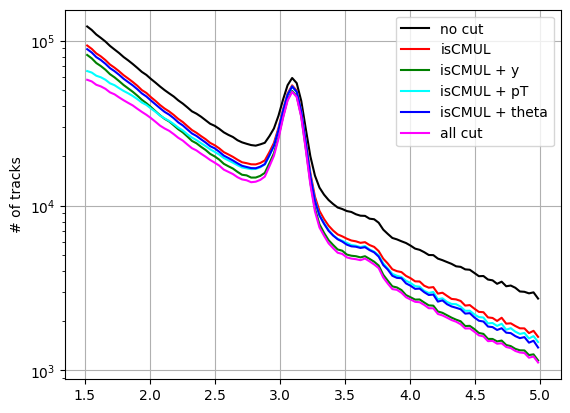

In [29]:
plt.plot(X, vMass_OS_nothing, color = "black", label = "no cut")
plt.plot(X, vMass_OS_CMUL, color = "red", label = "isCMUL")
plt.plot(X, vMass_OS_y, color = "green", label = "isCMUL + y")
plt.plot(X, vMass_OS_pT, color = "cyan", label = "isCMUL + pT")
plt.plot(X, vMass_OS_theta, color = "blue", label = "isCMUL + theta")
plt.plot(X, vMass_OS_all_cut, color = "magenta", label = "all cut")
plt.yscale('log')
plt.ylabel("# of tracks")
plt.grid(True)
plt.legend()

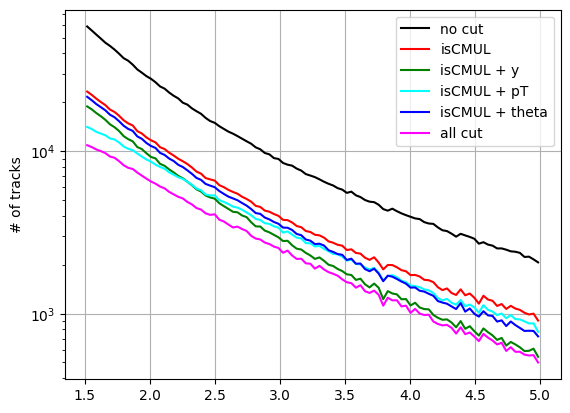

In [30]:
plt.plot(X, vMass_LS_nothing, color = "black", label = "no cut")
plt.plot(X, vMass_LS_CMUL, color = "red", label = "isCMUL")
plt.plot(X, vMass_LS_y, color = "green", label = "isCMUL + y")
plt.plot(X, vMass_LS_pT, color = "cyan", label = "isCMUL + pT")
plt.plot(X, vMass_LS_theta, color = "blue", label = "isCMUL + theta")
plt.plot(X, vMass_LS_all_cut, color = "magenta", label = "all cut")
plt.yscale('log')
plt.ylabel("# of tracks")
plt.grid(True)
plt.legend()